In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv("Heart_Disease_Prediction.csv")  # Ensure the correct filename

# Define features (X) and target variable (y)
X = df.iloc[:, :-1]  # All columns except the last one
y = df.iloc[:, -1]   # Assuming last column is the target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train KNN model
k = 5  # Choose number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Predict on test data
y_pred = knn.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {accuracy:.2f}")


KNN Accuracy: 0.65


KNN Accuracy: 0.65

Confusion Matrix:
 [[26  1  7]
 [ 1  0  1]
 [ 9  0  9]]

Classification Report:
               precision    recall  f1-score   support

           3       0.72      0.76      0.74        34
           6       0.00      0.00      0.00         2
           7       0.53      0.50      0.51        18

    accuracy                           0.65        54
   macro avg       0.42      0.42      0.42        54
weighted avg       0.63      0.65      0.64        54



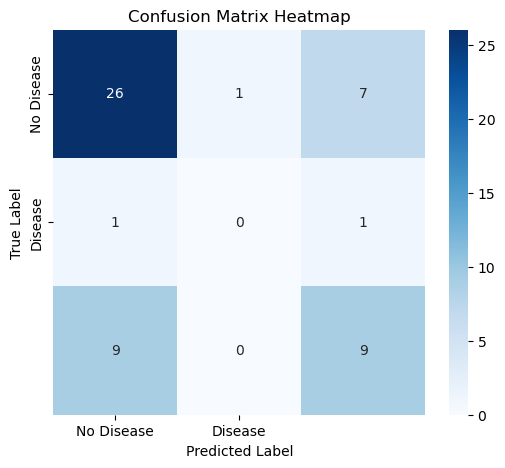

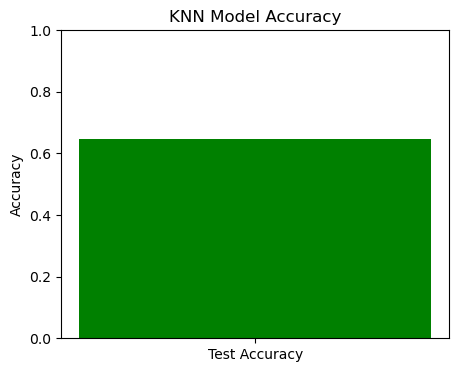

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
df = pd.read_csv("Heart_Disease_Prediction.csv")  # Ensure the correct filename

# Define features (X) and target variable (y)
X = df.iloc[:, :-1]  # All columns except the last one
y = df.iloc[:, -1]   # Assuming last column is the target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train KNN model
k = 5  # Choose number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Predict on test data
y_pred = knn.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Classification Report
report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

# Accuracy Visualization
plt.figure(figsize=(5, 4))
plt.bar(["Test Accuracy"], [accuracy], color="green")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.title("KNN Model Accuracy")
plt.show()


In [18]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load dataset (Replace 'horseColic.csv' with actual filename)
df = pd.read_csv("horseColic.csv", na_values="?")

# Convert all columns to numeric (handle mixed-type data)
df = df.apply(pd.to_numeric, errors='coerce')

# Select numerical columns only
num_cols = df.select_dtypes(include=[np.number]).columns
df = df[num_cols]

# Step 1: Create a separate copy of the original dataset
df_original = df.copy()

# Step 2: Introduce missing values for evaluation
missing_fraction = 0.1  # 10% missing values
np.random.seed(42)
missing_indices = np.random.choice(df.size, int(missing_fraction * df.size), replace=False)

df_missing = df_original.copy()
df_missing.values.ravel()[missing_indices] = np.nan  # Introduce missing values

# Step 3: Normalize the dataset before imputation
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_missing)  # Normalize the dataset

# Step 4: Apply KNN Imputer (with k=3)
knn_imputer = KNNImputer(n_neighbors=3)
df_imputed_scaled = knn_imputer.fit_transform(df_scaled)  # Impute missing values

# Step 5: Denormalize (reverse normalization) to original scale
df_imputed = scaler.inverse_transform(df_imputed_scaled)
df_imputed = pd.DataFrame(df_imputed, columns=df.columns)

# Step 6: Extract Original and Imputed Values for Comparison
true_values = df_original.values.ravel()[missing_indices]  # Original values before missing
imputed_values = df_imputed.values.ravel()[missing_indices]  # Imputed values

# Remove NaNs from both true and imputed values
valid_indices = ~np.isnan(true_values)  # Keep only valid values
true_values = true_values[valid_indices]
imputed_values = imputed_values[valid_indices]

# Compute Error Metrics
mad = np.mean(np.abs(true_values - imputed_values))  # Mean Absolute Deviation
mse = mean_squared_error(true_values, imputed_values)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
mae = mean_absolute_error(true_values, imputed_values)  # Mean Absolute Error

# Compute Accuracy (within ±5% tolerance)
tolerance = 0.05 * np.abs(true_values)
correct_imputations = np.abs(true_values - imputed_values) <= tolerance
accuracy_tolerance = np.mean(correct_imputations) * 100  # Convert to percentage

# Compute Exact Match Accuracy
exact_matches = np.sum(true_values == imputed_values)
accuracy_exact_match = (exact_matches / len(true_values)) * 100  # Exact match percentage

# Save the imputed dataset to CSV
df_imputed.to_csv("horseColicKnnImputation.csv", index=False)

# Print Results
print(f"Mean Absolute Deviation (MAD): {mad:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Imputation Accuracy (within ±5% tolerance): {accuracy_tolerance:.2f}%")
print(f"Exact Match Accuracy: {accuracy_exact_match:.2f}%")
print("Total missing values introduced:", np.isnan(df_missing.values).sum())
print("Total valid true_values:", len(true_values))
print("Total valid imputed_values:", len(imputed_values))
print("Sample true values:", true_values[:10])
print("Sample imputed values:", imputed_values[:10])

print("Imputed dataset saved as 'horseColicKnnImputation.csv'.")


Mean Absolute Deviation (MAD): 0.0000
Mean Squared Error (MSE): 0.0000
Root Mean Squared Error (RMSE): 0.0000
Mean Absolute Error (MAE): 0.0000
Imputation Accuracy (within ±5% tolerance): 99.57%
Exact Match Accuracy: 97.98%
Total missing values introduced: 1605
Total valid true_values: 693
Total valid imputed_values: 693
Sample true values: [2.000e+01 3.000e+00 3.205e+03 1.000e+00 1.000e+00 2.000e+00 1.000e+00
 1.000e+00 0.000e+00 2.000e+00]
Sample imputed values: [2.000e+01 3.000e+00 3.205e+03 1.000e+00 1.000e+00 2.000e+00 1.000e+00
 1.000e+00 0.000e+00 2.000e+00]
Imputed dataset saved as 'horseColicKnnImputation.csv'.


In [21]:
import pandas as pd
import numpy as np

# Load dataset (Replace 'your_dataset.csv' with the actual filename)
df = pd.read_csv("horseColic.csv", na_values="?")  # Replace '?' with NaN

# Display missing values count
print("Missing values per column:\n", df.isnull().sum())

### 1. **Drop Rows with Missing Values** (if missing data is significant)
df_drop_rows = df.dropna()
print("Drop Rows")
print(df_drop_rows.head(5))

### 2. **Drop Columns with Too Many Missing Values** (Threshold: 50% missing)
threshold = 0.5 * len(df)  # 50% of rows
df_drop_cols = df.dropna(axis=1, thresh=threshold)
print("Drop Columns")
print(df_drop_cols.head(5))

### 3. **Fill Missing Values with Mean/Median (For Numerical Data)**
df_fill_mean = df.copy()
df_fill_mean.fillna(df_fill_mean.mean(), inplace=True)  # Replace with mean
print("with Mean")
print(df_fill_mean.head(5))

df_fill_median = df.copy()
df_fill_median.fillna(df_fill_median.median(), inplace=True)  # Replace with median
print("with Median")
print(df_fill_median.head(5))

### 4. **Fill Missing Values with Mode (For Categorical Data)**
df_fill_mode = df.copy()
for col in df_fill_mode.select_dtypes(include=['object']):  # Only categorical
    df_fill_mode[col].fillna(df_fill_mode[col].mode()[0], inplace=True)
print(df_fill_mode.head(5))

### 5. **Forward Fill & Backward Fill (Useful for Time-Series)**
df_ffill = df.fillna(method='ffill')  # Forward Fill
df_bfill = df.fillna(method='bfill')  # Backward Fill
print("Forward Fill")
print(df_ffill.head(5))
print("Backward Fill")
print(df_bfill.head(5))

# Save processed datasets if needed
df_fill_mean.to_csv("filled_mean.csv", index=False)
df_fill_median.to_csv("filled_median.csv", index=False)
df_fill_mode.to_csv("filled_mode.csv", index=False)
df_ffill.to_csv("forward_fill.csv", index=False)
df_bfill.to_csv("backward_fill.csv", index=False)

print("Data Preprocessing Completed!")

Missing values per column:
 surgery                          1
Age                              0
Hospital Number                  0
rectal temperature              60
pulse                           24
respiratory rate                58
temperature of extremities      56
peripheral pulse                69
mucous membranes                47
capillary refill time           32
pain                            55
peristalsis                     44
abdominal distension            56
nasogastric tube               104
nasogastric reflux             106
nasogastric reflux PH          247
rectal examination             102
abdomen                        118
packed cell volume              29
total protein                   33
abdominocentesis appearance    165
abdomcentesis total protein    198
outcome                          1
surgical lesion                  0
type of lesion 1                 0
type of lesion 2                 0
type of lesion 3                 0
cp_data                    